<a href="https://colab.research.google.com/github/joaoholandaa/motor-de-busca/blob/main/motor_de_busca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install WordCloud

In [ ]:
# Libs
import numpy as np
import pandas as pd

# Pacote para trabalhar com dados HTML e XML
from bs4 import BeautifulSoup

# Pacote para requisições HTTP
import requests

# Pacote para nuvem de palavras
from wordcloud import WordCloud

# Análises gráficas
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Link do site
site = 'https://news.google.com/search?q=f%C3%B3rmula%201&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'

# Requisição
pagina = requests.get(site)

type(pagina)

requests.models.Response

In [ ]:
# Lendo os dados no BS
coleta = BeautifulSoup(pagina.text, 'html.parser')

In [ ]:
# Título
coleta.title.string

'Google Notícias - Pesquisar'

In [ ]:
# Pesquisando uma classe no HTML
coleta.find(class_='JtKRv').string

'GP do Bahrein: Hamilton lidera dobradinha da Mercedes no segundo treino'

In [ ]:
coleta.find(class_='JtKRv').name

'a'

In [ ]:
len(coleta.find_all('a'))

235

In [ ]:
# Função

def buscar(name):

    #Criando uma URL dinâmica
    url = f'https://news.google.com/search?q={name}=pt-BR&gl=BR&ceid=BR%3Apt-419'

    # Respostas pela requests
    resposta = requests.get(url)

    # Transformar em texto a resposta
    codigo_html = resposta.text

    # Converter
    obj_soup = BeautifulSoup(codigo_html, 'html.parser')

    return obj_soup

In [ ]:
buscar('Jornada Mundial da Juventude')

In [ ]:
# Buscar dados
dados = buscar('Jornada Mundial da Juventude')
len(dados)

4

In [ ]:
# Buscar títulos com classe "JtKRv"
elementos = dados.find_all(class_="JtKRv")
len(elementos)

78

In [ ]:
# Buscar os textos
noticias = [texto.get_text() for texto in elementos]
print('Notícias localizadas')
len(noticias)

Notícias localizadas


78

In [ ]:
print('***' * 7)
print('Notícias localizadas')
print('***' * 7)

for numero, loop in enumerate(noticias[0:10]):
    print('--' * 10)
    print(numero, '-', loop)

*********************
Notícias localizadas
*********************
--------------------
0 - Jornada Mundial da Juventude 2023 - Recomendações aos peregrinos. — Ministério das Relações Exteriores
--------------------
1 - A mensagem do Papa Francisco para a Jornada Mundial da Juventude
--------------------
2 - Papa recorda a JMJ de Lisboa ao receber premiê português
--------------------
3 - Viagem Apostólica a Portugal por ocasião da Jornada Mundial da Juventude
--------------------
4 - Rio em festa pelos 10 anos da JMJ 2013 com o Papa Francisco
--------------------
5 - “Não queremos converter o jovem a Cristo“, diz cardeal eleito responsável pela JMJ Lisboa 2023
--------------------
6 - Hino da Jornada Mundial da Juventude 2023 ganha versão brasileira
--------------------
7 - Jornada Mundial da Juventude arranca em Lisboa
--------------------
8 - Guia sobre a Jornada Mundial da Juventude
--------------------
9 - Um guia para a semana da Jornada Mundial da Juventude


## NLP - Stop Words

In [ ]:
# Remover Stop Words

# Importar o NLTK
import nltk
from nltk.corpus import stopwords

# Download
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Palavras stopwords português
lista_palavras = stopwords.words('portuguese')
len(lista_palavras)

207

In [ ]:
type(lista_palavras)

list

In [ ]:
lista_palavras[0:5]

['a', 'à', 'ao', 'aos', 'aquela']

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.stem import WordNetLemmatizer

# Defina sua lista de stop words aqui ou use a lista do NLTK
# lista_stop_words = [...]

# Pontuação em português
pontuacao = string.punctuation + '“”‘’'

# String para juntar todo o texto
concatenar = ''
lista_palavras_retiradas = []

# Inicializa o lematizador para lematização
lemmatizer = WordNetLemmatizer()

# Loop nas notícias
for loop in noticias[0:]:
    # Remover pontuação
    loop_sem_pontuacao = loop.translate(str.maketrans('', '', pontuacao))

    # Remover números usando expressões regulares
    loop_sem_numeros = re.sub(r'\d+', '', loop_sem_pontuacao)

    # Tokenização usando NLTK
    tokens = word_tokenize(loop_sem_numeros, language='portuguese')

    # Remover stop words usando NLTK ou sua lista definida
    stop_words = set(stopwords.words('portuguese'))
    tokens_sem_stop_words = [word for word in tokens if word.lower() not in stop_words]

    # Lematização usando NLTK
    tokens_lematizados = [lemmatizer.lemmatize(word) for word in tokens_sem_stop_words]

    # Juntar as palavras lematizadas em uma string
    texto_lematizado = ' '.join(tokens_lematizados)

    concatenar += ' ' + texto_lematizado

    # Palavras retiradas (stop words e números)
    palavras_retiradas = [word for word in tokens if word.lower() in stop_words or word.isdigit()]
    lista_palavras_retiradas.extend(palavras_retiradas)

print('Total de palavras retiradas:', len(lista_palavras_retiradas))


Total de palavras retiradas: 341


In [ ]:
concatenar

' Jornada Mundial Juventude Recomendações peregrinos — Ministério Relações Exteriores mensagem Papa Francisco Jornada Mundial Juventude Papa recorda JMJ Lisboa receber premiê português Viagem Apostólica Portugal ocasião Jornada Mundial Juventude Rio festa ano JMJ Papa Francisco queremos converter jovem Cristo diz cardeal eleito responsável JMJ Lisboa Hino Jornada Mundial Juventude ganha versão brasileira Jornada Mundial Juventude arranca Lisboa Guia sobre Jornada Mundial Juventude guia semana Jornada Mundial Juventude Oficial Planos mobilidade segurança Jornada Mundial Juventude Lisboa Jornada Mundial Juventude « segunda Páscoa » « Páscoa Verão » Rescaldo JMJ mundo noticiou evento superou toda expectativas JMJ toca profundamente coração todos peregrinos diz jovem brasileiro Papa Francisco deixa recados ante Acolhimento Jornada Mundial Juventude JMJ Milhares jovens vivem primeiro banho multidão Lisboa cfotos Greves durante Jornada Mundial Juventude guia orientar Ecos Jornada Mundial Juv

## Contagem de Palavras

In [ ]:
# Contagem de palavras
from collections import Counter

# Dividir a string concatenar em palavras
palavras = concatenar.split()

# Contagem de palavras
contagem_palavras = Counter(palavras)

# Exibir as 10 palavras mais comuns
print(contagem_palavras.most_common(50))

[('Jornada', 44), ('Juventude', 43), ('Mundial', 41), ('JMJ', 33), ('Papa', 20), ('Lisboa', 19), ('Francisco', 9), ('vai', 8), ('evento', 7), ('dia', 7), ('Portugal', 6), ('durante', 6), ('religioso', 6), ('peregrinos', 5), ('todos', 5), ('portuguesa', 5), ('diz', 4), ('«', 4), ('»', 4), ('mundo', 4), ('toda', 4), ('português', 3), ('ano', 3), ('jovem', 3), ('sobre', 3), ('guia', 3), ('semana', 3), ('jovens', 3), ('onde', 3), ('milhões', 3), ('—', 2), ('mobilidade', 2), ('segurança', 2), ('Páscoa', 2), ('deixa', 2), ('primeiro', 2), ('espera', 2), ('Igreja', 2), ('II', 2), ('números', 2), ('RTP', 2), ('Fátima', 2), ('ver', 2), ('amor', 2), ('vão', 2), ('ago', 2), ('Moedas', 2), ('respostas', 2), ('menos', 2), ('Economia', 2)]


In [ ]:
# Cria o Data Frame
analise_palavras = pd.DataFrame(contagem_palavras, index=[0]).transpose().reset_index()

# Renomea as colunas
analise_palavras.columns = ['Palavra', 'Quantidade']

# Ordenar
analise_palavras.sort_values( by='Quantidade', ascending=False, inplace=True )

analise_palavras

,Palavra,Quantidade
0,Jornada,44
2,Juventude,43
1,Mundial,41
13,JMJ,33
10,Papa,20
...,...,...
132,Tejo,1
134,MINUTO,1
135,Continuem,1
136,cavalgar,1


In [ ]:
# Representação
analise_palavras['%_Representação'] = analise_palavras.Quantidade.cumsum() / analise_palavras.Quantidade.sum() * 100
analise_palavras

,Palavra,Quantidade,%_Representação
0,Jornada,44,7.166124
2,Juventude,43,14.169381
1,Mundial,41,20.846906
13,JMJ,33,26.221498
10,Papa,20,29.478827
...,...,...,...
132,Tejo,1,99.348534
134,MINUTO,1,99.511401
135,Continuem,1,99.674267
136,cavalgar,1,99.837134


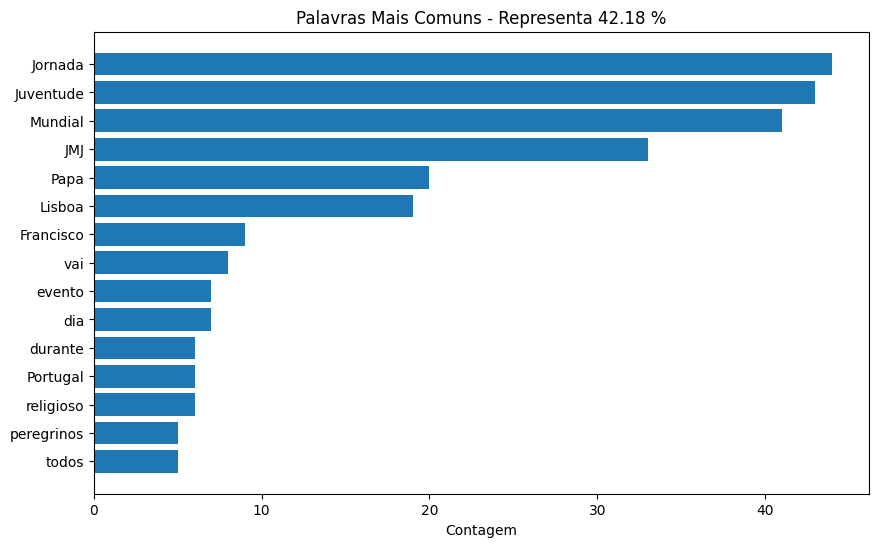

In [ ]:
# 20 Palavras mais citdads
Filtro_Top_20 = analise_palavras.head(15)
Titutlo_Max = round(Filtro_Top_20['%_Representação'].max(), 2)

# Plot
plt.figure( figsize=(10, 6) )
plt.barh(Filtro_Top_20.Palavra, Filtro_Top_20.Quantidade)
plt.xlabel('Contagem')
plt.title(f'Palavras Mais Comuns - Representa { Titutlo_Max } %')
plt.gca().invert_yaxis()  # Inverter a ordem das palavras mais comuns
plt.show()

In [ ]:
# Dados do cabeçalho e valores
cabecalho = ['Noticia']
valores = noticias[0:5]

LinhaBranca = 'white'
LinhaAzul = 'paleturquoise'

# Criação da tabela
tabela = go.Figure(
    data=[
        go.Table(
            header=dict( values=cabecalho, fill_color='RoyalBlue', font_color='white', height=40, align='left', font_size=10 ),
            cells=dict( values=[valores], height=30, align='left', line_color='#f5f5f5', font_size=10,
                       fill_color=[[LinhaBranca, LinhaAzul, LinhaBranca, LinhaAzul,LinhaBranca, LinhaAzul,LinhaBranca, LinhaAzul,LinhaBranca, LinhaAzul ]] )
        )
    ]
)

# Configurações de layout da tabela
tabela.update_layout(
    title='Principais Noticías',
    width=1000,
    height=380
)

# Exibindo a tabela
tabela.show()

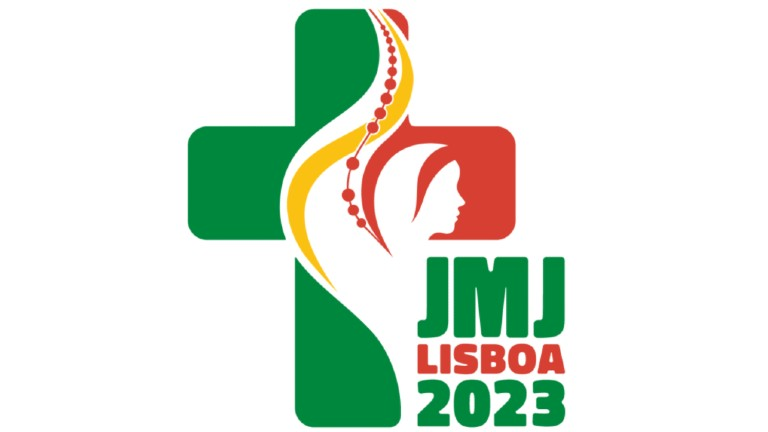

In [ ]:
from PIL import Image
selo = Image.open('jmj2023.jpg')
selo

In [ ]:
# Criar a Figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'table'}],
        [{'type':'bar'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('', 'Palavras mais frequentes')
)

# Layout e Dimensão
Figura.update_layout(
    width=1000, height=820, title_text='<b>Data Analytics</b> <br>Motor de Pesquisa'
)

# Adicionando o icone do selo
Figura.add_layout_image(
    dict( source=selo, x=1, y=1.02, sizex=0.07,
         sizey=0.07, xanchor='right', yanchor='bottom')
)

# Dados do cabeçalho e valores
cabecalho = ['Notícias | Jornada Mundial da Juventude']
valores = noticias[0:5]

LinhaBranca = 'white'
LinhaAzul = 'paleturquoise'

Figura.add_trace(
     go.Table(
            header=dict( values=cabecalho, fill_color='RoyalBlue', font_color='white', height=40, align='left', font_size=16 ),
            cells=dict( values=[valores], height=50, align='left', line_color='#f5f5f5', font_size=14,
                       fill_color=[[LinhaBranca, LinhaAzul,LinhaBranca, LinhaAzul,LinhaBranca, LinhaAzul,LinhaBranca, LinhaAzul,LinhaBranca, LinhaAzul ]] )
        ),
    row=1, col=1
)

# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Bar(
        x=Filtro_Top_20.Palavra,
        y=Filtro_Top_20.Quantidade,
        textposition="outside",
        texttemplate="",
        marker_color='royalblue',
    ),
    row=2, col=1
)

# Rodapes
Figura.add_annotation(
    showarrow=False,
    text='By: @João Pedro Holanda',
    font=dict(size=11),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-0.25
)

Figura